In [17]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TLegend.h"
//cpp
#include <vector>
#include <iostream>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

auto RecoTriplet(Vec<float> gen_pt, Vec<float> gen_eta, Vec<float> gen_phi, Vec<int> gen_charge,
                 Vec<float> puppi_pt, Vec<float> puppi_eta, Vec<float> puppi_phi, Vec<int> puppi_charge, Vec<int> puppi_pdg){
    Vec<int> puppi_pdg_idx;
    Vec<size_t> PG_idx;
    Vec<size_t> G_idx;
    //          PGD             //
    for(int i = 0; i < puppi_pdg.size(); ++i) { //make list of pions or electron
        if (abs(puppi_pdg[i]) == 211 || abs(puppi_pdg[i]) == 11) puppi_pdg_idx.push_back(i);
        // puppi_pdg_idx.push_back(i);
    }
    //          DELTA R             //
    for(std::size_t i=0; i<3; i++){
        Vec<float> dr_vec;
        if(puppi_pdg_idx.size()==0) continue;
        for(size_t j : puppi_pdg_idx){
            float DR = ROOT::VecOps::DeltaR(gen_eta[i], puppi_eta[j], gen_phi[i], puppi_phi[j]);
            dr_vec.push_back(DR);
        }
        if(dr_vec.size()==0) continue;
        auto min_it = std::min_element(dr_vec.begin(), dr_vec.end());  // iteratore all'elemento minimo
        int min_idx = std::distance(dr_vec.begin(), min_it);      // indice dell'elemento minimo
        if(dr_vec[min_idx]<0.1) {
            PG_idx.push_back(puppi_pdg_idx[min_idx]);
            G_idx.push_back(i);
        }
    }
//     if( PG_idx.size() != G_idx.size()) {
//         cout << "??"<< endl;
//         std::cout << "Puppi gen size: "<< PG_idx.size() << std::endl;
//         std::cout << "Gen size: "<< G_idx.size() << std::endl;
    // }
    // std::cout << "Puppi gen size: " << PG_idx.size() << std::endl;
    // std::cout << "Gen size: " <<G_idx.size() << std::endl;

    //          PT             //
    for(std::size_t k=0; k<PG_idx.size(); k++){
        if(puppi_pt[PG_idx[k]] <= gen_pt[G_idx[k]]/2 || puppi_pt[PG_idx[k]] >= 2*gen_pt[G_idx[k]]){
            PG_idx.erase(PG_idx.begin() + k);
            G_idx.erase(G_idx.begin() + k);
        }
    }
    // if( PG_idx.size() != G_idx.size()) {
    //     cout << "!!"<< endl;
    //     std::cout << "Puppi gen size: "<< PG_idx.size() << std::endl;
    //     std::cout << "Gen size: "<< G_idx.size() << std::endl;
    // }
    

    //          CHARGE          //

    // for(std::size_t l=0; l<PG_idx.size(); l++){
    //         if(gen_charge[G_idx[l]] != puppi_charge[PG_idx[l]]){
    //             G_idx.erase(std::remove(G_idx.begin(), G_idx.end(), G_idx[l]), G_idx.end());
    //             PG_idx.erase(std::remove(PG_idx.begin(), PG_idx.end(), PG_idx[l]), PG_idx.end());
    //         }
    // }
    return PG_idx;
}


auto RecoTriplet_gen(Vec<float> gen_pt, Vec<float> gen_eta, Vec<float> gen_phi, Vec<int> gen_charge,
                 Vec<float> puppi_pt, Vec<float> puppi_eta, Vec<float> puppi_phi, Vec<int> puppi_charge, Vec<int> puppi_pdg){
    Vec<int> puppi_pdg_idx;
    Vec<size_t> PG_idx;
    Vec<size_t> G_idx;
    //          PGD             //
    for(int i = 0; i < puppi_pdg.size(); ++i) { //make list of pions or electron
        // if (abs(puppi_pdg[i]) == 211 || abs(puppi_pdg[i]) == 11) puppi_pdg_idx.push_back(i);
        puppi_pdg_idx.push_back(i);

    }
    //          DELTA R             //
    for(std::size_t i=0; i<3; i++){
        Vec<float> dr_vec;
        for(size_t j : puppi_pdg_idx){
            float DR = ROOT::VecOps::DeltaR(gen_eta[i], puppi_eta[j], gen_phi[i], puppi_phi[j]);
            dr_vec.push_back(DR);
        }
        if(dr_vec.size()==0) continue;
        auto min_it = std::min_element(dr_vec.begin(), dr_vec.end());  // iteratore all'elemento minimo
        int min_idx = std::distance(dr_vec.begin(), min_it);      // indice dell'elemento minimo
        if(dr_vec[min_idx]<0.1) {
            PG_idx.push_back(puppi_pdg_idx[min_idx]);
            G_idx.push_back(i);
        }
    }

    //          PT             //
    for(std::size_t k=0; k<PG_idx.size(); k++){
        if(puppi_pt[PG_idx[k]] <= gen_pt[G_idx[k]]/2 || puppi_pt[PG_idx[k]] >= 2*gen_pt[G_idx[k]]){
            // PG_idx.erase(std::remove(PG_idx.begin(), PG_idx.end(), PG_idx[k]), PG_idx.end());
            // G_idx.erase(std::remove(G_idx.begin(), G_idx.end(), G_idx[k]), G_idx.end());
            PG_idx.erase(PG_idx.begin() + k);
            G_idx.erase(G_idx.begin() + k);
        }
    }
    //          CHARGE          //

    // for(std::size_t l=0; l<PG_idx.size(); l++){
    //         if(gen_charge[G_idx[l]] != puppi_charge[PG_idx[l]]){
    //             G_idx.erase(std::remove(G_idx.begin(), G_idx.end(), G_idx[l]), G_idx.end());
    //             PG_idx.erase(std::remove(PG_idx.begin(), PG_idx.end(), PG_idx[l]), PG_idx.end());
    //         }
    // }
    return G_idx;
}

In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TLegend.h"
//cpp
#include <vector>
#include <iostream>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

auto RecoTriplet(Vec<float> gen_pt, Vec<float> gen_eta, Vec<float> gen_phi, Vec<int> gen_charge,
                 Vec<float> puppi_pt, Vec<float> puppi_eta, Vec<float> puppi_phi, Vec<int> puppi_charge, Vec<int> puppi_pdg){
    Vec<int> puppi_pdg_idx;
    Vec<size_t> PG_idx;
    Vec<size_t> G_idx;
    //          PGD             //
    for(int i = 0; i < puppi_pdg.size(); ++i) { //make list of pions or electron
        if (abs(puppi_pdg[i]) == 211 || abs(puppi_pdg[i]) == 11) puppi_pdg_idx.push_back(i);
        // puppi_pdg_idx.push_back(i);
    }
    //          DELTA R             //
    for(std::size_t i=0; i<3; i++){
        Vec<float> dr_vec;
        if(puppi_pdg_idx.size()==0) continue;
        for(size_t j : puppi_pdg_idx){
            float DR = ROOT::VecOps::DeltaR(gen_eta[i], puppi_eta[j], gen_phi[i], puppi_phi[j]);
            dr_vec.push_back(DR);
        }
        if(dr_vec.size()==0) continue;
        auto min_it = std::min_element(dr_vec.begin(), dr_vec.end());  // iteratore all'elemento minimo
        int min_idx = std::distance(dr_vec.begin(), min_it);      // indice dell'elemento minimo
        if(dr_vec[min_idx]<0.1) {
            PG_idx.push_back(puppi_pdg_idx[min_idx]);
            G_idx.push_back(i);
        }
    }
    //          PT             //
    for(std::size_t k=0; k<PG_idx.size(); k++){
        if(puppi_pt[PG_idx[k]] <= gen_pt[G_idx[k]]/2 || puppi_pt[PG_idx[k]] >= 2*gen_pt[G_idx[k]]){
            PG_idx.erase(PG_idx.begin() + k);
            G_idx.erase(G_idx.begin() + k);
        }
    }
    return PG_idx;
}

///////////////////////////////////////////////////////////////////////////////////////////////
//                         GEN                      //
///////////////////////////////////////////////////////////////////////////////////////////////

auto RecoTripletGen(Vec<float> gen_pt, Vec<float> gen_eta, Vec<float> gen_phi, Vec<int> gen_charge,
                 Vec<float> puppi_pt, Vec<float> puppi_eta, Vec<float> puppi_phi, Vec<int> puppi_charge, Vec<int> puppi_pdg){
    Vec<int> puppi_pdg_idx;
    Vec<size_t> PG_idx;
    Vec<size_t> G_idx;
    //          PGD             //
    for(int i = 0; i < puppi_pdg.size(); ++i) { //make list of pions or electron
        if (abs(puppi_pdg[i]) == 211 || abs(puppi_pdg[i]) == 11) puppi_pdg_idx.push_back(i);
        // puppi_pdg_idx.push_back(i);
    }
    //          DELTA R             //
    for(std::size_t i=0; i<3; i++){
        Vec<float> dr_vec;
        if(puppi_pdg_idx.size()==0) continue;
        for(size_t j : puppi_pdg_idx){
            float DR = ROOT::VecOps::DeltaR(gen_eta[i], puppi_eta[j], gen_phi[i], puppi_phi[j]);
            dr_vec.push_back(DR);
        }
        if(dr_vec.size()==0) continue;
        auto min_it = std::min_element(dr_vec.begin(), dr_vec.end());  // iteratore all'elemento minimo
        int min_idx = std::distance(dr_vec.begin(), min_it);      // indice dell'elemento minimo
        if(dr_vec[min_idx]<0.1) {
            PG_idx.push_back(puppi_pdg_idx[min_idx]);
            G_idx.push_back(i);
        }
    }
    //          PT             //
    for(std::size_t k=0; k<PG_idx.size(); k++){
        if(puppi_pt[PG_idx[k]] <= gen_pt[G_idx[k]]/2 || puppi_pt[PG_idx[k]] >= 2*gen_pt[G_idx[k]]){
            PG_idx.erase(PG_idx.begin() + k);
            G_idx.erase(G_idx.begin() + k);
        }
    }
    return G_idx;
}

In [2]:
auto Res_function(Vec<float> reco_pt, Vec<float> gen_pt,Vec<int> reco_charge, Vec<int> gen_charge){
    Vec<float> resolution;
    for(int i=0; i<gen_pt.size();i++){
        resolution.push_back((gen_charge[i]/gen_pt[i] - reco_charge[i]/reco_pt[i]) * gen_pt[i]/gen_charge[i]);
    }
    return resolution;
}

In [2]:
bool notempty(Vec<std::size_t> index) { //used to check if any triplets passed in an event
    return !index.empty();
}

In [3]:
float inv_mass_func(ROOT::VecOps::RVec<float> gen_pt,
                   ROOT::VecOps::RVec<float> gen_eta, 
                   ROOT::VecOps::RVec<float> gen_phi, 
                   ROOT::VecOps::RVec<float> gen_mass,
                   ROOT::VecOps::RVec<float> reco_pt,
                   ROOT::VecOps::RVec<float> reco_eta, 
                   ROOT::VecOps::RVec<float> reco_phi, 
                   ROOT::VecOps::RVec<float> reco_mass){

    float gen_invmass  = ROOT::VecOps::InvariantMass(gen_pt, gen_eta, gen_phi, gen_mass);
    float reco_invmass = ROOT::VecOps::InvariantMass(reco_pt, reco_eta, reco_phi, reco_mass);

    return ((gen_invmass - reco_invmass)/gen_invmass) ;
}

In [12]:
bool eta_filter2(ROOT::VecOps::RVec<float> v){
    return ROOT::VecOps::All(ROOT::VecOps::Map(v, [](float x){return (abs(x)<1.5); }));
}

In [13]:
auto file_path = "l1Nano_WTo3Pion_PU200_iso.root";
auto tree_name = "Events";

ROOT::RDataFrame df(tree_name,file_path);
// df.Describe();

auto df_reco = df.Filter(eta_filter2, {"GenPi_eta"})
                .Define("RecoPuppi_idx", RecoTriplet, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Define("RecoGen_idx", RecoTripletGen, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Filter(notempty, {"RecoGen_idx"})
                .Filter(notempty, {"RecoPuppi_idx"});



In [14]:
auto rec_pup = df_reco.Take<ROOT::VecOps::RVec<unsigned long>>("RecoPuppi_idx").GetValue();
auto rec_gen = df_reco.Take<ROOT::VecOps::RVec<unsigned long>>("RecoGen_idx").GetValue();

In [15]:
Vec<float> genpi_pt = df_reco.Take<Vec<float>>("GenPi_pt").GetValue()[35];
std::cout << genpi_pt << std::endl;
std::cout << rec_gen[35] << std::endl;
auto vtake = ROOT::VecOps::Take(genpi_pt, rec_gen[35]);
std::cout << vtake << std::endl;
std::cout << "\n" << std::endl;

Vec<float> L1pup_pt = df_reco.Take<Vec<float>>("L1Puppi_pt").GetValue()[35];
std::cout << L1pup_pt << std::endl;
std::cout << rec_pup[35] << std::endl;
auto vtake2 = ROOT::VecOps::Take(L1pup_pt, rec_pup[35]);
std::cout << vtake2 << std::endl;


{ 34.25, 23.0625, 27.25 }
{ 0, 1, 2 }
{ 34.25, 23.0625, 27.25 }


{ 3, 2.25, 2.25, 2, 2.25, 3.5, 2.25, 34, 14, 2.25, 3.25, 23.5, 28, 4.75, 2.75, 2.25, 2.25, 3.25, 3.75, 2, 2 }
{ 7, 11, 12 }
{ 34, 23.5, 28 }


In [6]:
std::cout << rec_gen.size() << std::endl;
std::cout << rec_pup.size() << std::endl;

29252
29252


In [7]:
std::cout << *df_reco.Count() << std::endl;
std::cout << *df.Count() << std::endl;


29252
50400


In [16]:
auto df_reco_pt = df_reco.Define("Reco_pt", "Take(L1Puppi_pt, RecoPuppi_idx)")
                         .Define("Gen_pt", "Take(GenPi_pt, RecoGen_idx)");
                         .Define("Reco_eta", "Take(L1Puppi_eta, RecoPuppi_idx)")
                         .Define("Gen_eta", "Take(GenPi_eta, RecoGen_idx)")
                         .Define("Reco_phi", "Take(L1Puppi_phi, RecoPuppi_idx)")
                         .Define("Gen_phi", "Take(GenPi_phi, RecoGen_idx)")
                         .Define("Reco_mass", "Take(L1Puppi_mass, RecoPuppi_idx)")
                         .Define("Gen_mass", "Take(GenPi_mass, RecoGen_idx)")
                         .Define("Reco_charge", "Take(L1Puppi_charge, RecoPuppi_idx)")
                         .Define("Gen_charge", "Take(GenPi_charge, RecoGen_idx)")
                         .Define("pt_resolution", Res_function, {"Reco_pt", "Gen_pt", "Reco_charge", "Gen_charge"});
                        //  .Define("mass_res", inv_mass_func, {"Gen_pt", "Gen_eta", "Gen_phi", "Gen_mass","Reco_pt", "Reco_eta", "Reco_phi", "Reco_mass"});

auto puppi_reco_pt = df_reco_pt.Take<ROOT::VecOps::RVec<float>>("Reco_pt").GetValue();
auto gen_reco_pt = df_reco_pt.Take<ROOT::VecOps::RVec<float>>("Gen_pt").GetValue();
auto ptres = df_reco_pt.Take<ROOT::VecOps::RVec<float>>("pt_resolution").GetValue();

In [21]:
std::cout << puppi_reco_pt[35] << std::endl;
std::cout <<   gen_reco_pt[35] << std::endl;


{ 34, 23.5, 28 }
{ 34.25, 23.0625, 27.25 }


In [17]:
for(int i=0; i<puppi_reco_pt.size();i++){
    if(puppi_reco_pt[i].size() != gen_reco_pt[i].size()){

        std::cout << "!!" << std::endl;
        std::cout << puppi_reco_pt[i].size() << std::endl;
        std::cout << gen_reco_pt[i].size() << std::endl;
        std::cout << "ev:" <<  i << std::endl;
        std::cout << "!!" << std::endl;
    }
}

In [20]:
std::cout << puppi_reco_pt << std::endl;
std::cout << gen_reco_pt << std::endl;
// std::cout << ptres << std::endl;

input_line_121:2:12: error: invalid operands to binary expression ('std::ostream' (aka 'basic_ostream<char>') and 'std::vector<ROOT::VecOps::RVec<float>, std::allocator<ROOT::VecOps::RVec<float> > >')
 std::cout << puppi_reco_pt << std::endl;
 ~~~~~~~~~ ^  ~~~~~~~~~~~~~
/home/conda/feedstock_root/build_artifacts/root_base_1679383249393/_build_env/x86_64-conda-linux-gnu/include/c++/11.3.0/system_error:279:5: note: candidate function template not viable: no known conversion from 'std::vector<ROOT::VecOps::RVec<float>, std::allocator<ROOT::VecOps::RVec<float> > >' to 'const std::error_code' for 2nd argument
    operator<<(basic_ostream<_CharT, _Traits>& __os, const error_code& __e)
    ^
/home/conda/feedstock_root/build_artifacts/root_base_1679383249393/_build_env/x86_64-conda-linux-gnu/include/c++/11.3.0/ostream:518:5: note: candidate function template not viable: no known conversion from 'std::vector<ROOT::VecOps::RVec<float>, std::allocator<ROOT::VecOps::RVec<float> > >' to 'char' for 

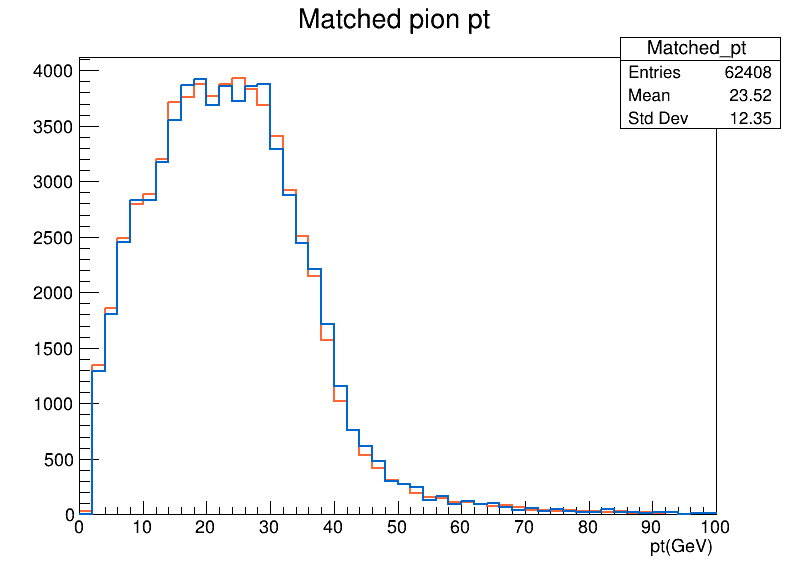

In [10]:
auto hist = df_reco_pt.Histo1D({"Matched_pt", "Matched pion pt;pt(GeV)", 50, 0, 100}, "Reco_pt");
auto hist2 = df_reco_pt.Histo1D({"Matched_pt", "Matched pion pt;pt(GeV)", 50, 0, 100}, "Gen_pt");
auto c1 = new TCanvas("c1", "c1", 800,600);

hist->SetLineColor(kAzure+2);
hist->SetLineWidth(2);

hist2->SetLineColor(kOrange+8);
hist2->SetLineWidth(2);

hist2 -> Draw();
hist -> Draw("same");
c1 -> Draw();

In [11]:
std::cout <<  hist  -> GetEntries() << std::endl;
std::cout <<  hist2 -> GetEntries() << std::endl;


62408
62408


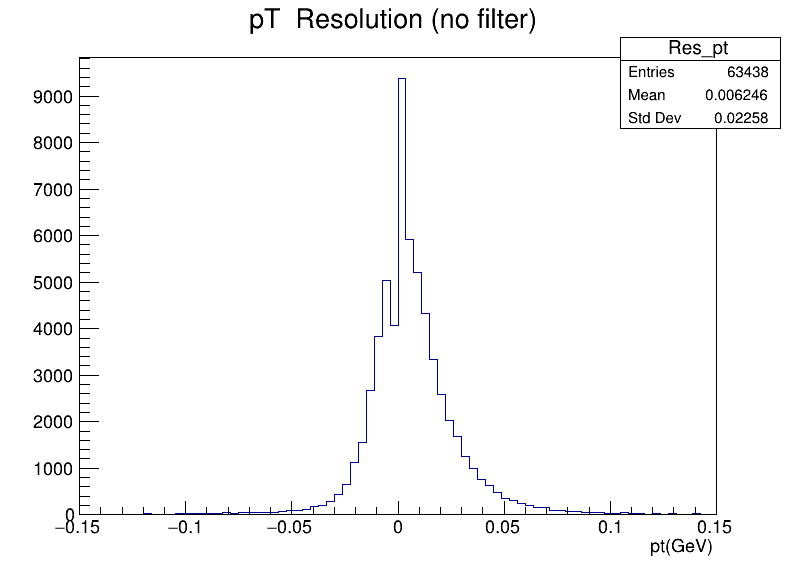

In [10]:
// auto df_res   = df_reco_pt.Define("pt_resolution", Res_function, {"Reco_pt", "Gen_pt", "Reco_charge", "Gen_charge"});
auto pt_res_hist = df_reco_pt.Histo1D({"Res_pt", "pT  Resolution (no filter);pt(GeV)", 80, -0.15, 0.15}, "pt_resolution");
auto c2 = new TCanvas("c2", "c2", 800,600);
pt_res_hist -> Draw();
c2 -> Draw();

### Efficiency

In [11]:
double N_Gen = *df.Count() *3;
double N_GenReco = pt_res_hist -> GetEntries();
double eff = N_GenReco / N_Gen;

std::cout << "Efficiency: " << eff*100 << " %" << std::endl;


Efficiency: 41.9563 %


In [12]:
// auto mass_res_hist = df_reco_pt.Histo1D({"Res_pt", "Matched pion pt;pt(GeV)", 60, -0.15, 0.15}, "mass_res");
// auto c3 = new TCanvas("c3", "c3", 800,600);
// mass_res_hist -> Draw();
// c3 -> Draw();

# $p_T$>10Gev

In [13]:
bool pt_filter(Vec<float> v){
    return ROOT::VecOps::All(ROOT::VecOps::Map(v, [](float x){return (x>10.f); }));;
}

In [14]:
auto df_filter = df.Filter(pt_filter, {"GenPi_pt"});
cout <<*df_filter.Count()<< endl;


26112


In [15]:
auto df_filter_reco = df_filter.Define("RecoPuppi_idx", RecoTriplet, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Define("RecoGen_idx", RecoTriplet_gen, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Filter(notempty, {"RecoGen_idx"})
                .Define("Reco_pt", "Take(L1Puppi_pt, RecoPuppi_idx)")
                .Define("Gen_pt", "Take(GenPi_pt, RecoGen_idx)")
                .Define("Reco_eta", "Take(L1Puppi_eta, RecoPuppi_idx)")
                .Define("Gen_eta", "Take(GenPi_eta, RecoGen_idx)")
                .Define("Reco_phi", "Take(L1Puppi_phi, RecoPuppi_idx)")
                .Define("Gen_phi", "Take(GenPi_phi, RecoGen_idx)")
                .Define("Reco_mass", "Take(L1Puppi_mass, RecoPuppi_idx)")
                .Define("Gen_mass", "Take(GenPi_mass, RecoGen_idx)")
                .Define("Reco_charge", "Take(L1Puppi_charge, RecoPuppi_idx)")
                .Define("Gen_charge", "Take(GenPi_charge, RecoGen_idx)")
                .Define("pt_resolution", Res_function, {"Reco_pt", "Gen_pt", "Reco_charge", "Gen_charge"});

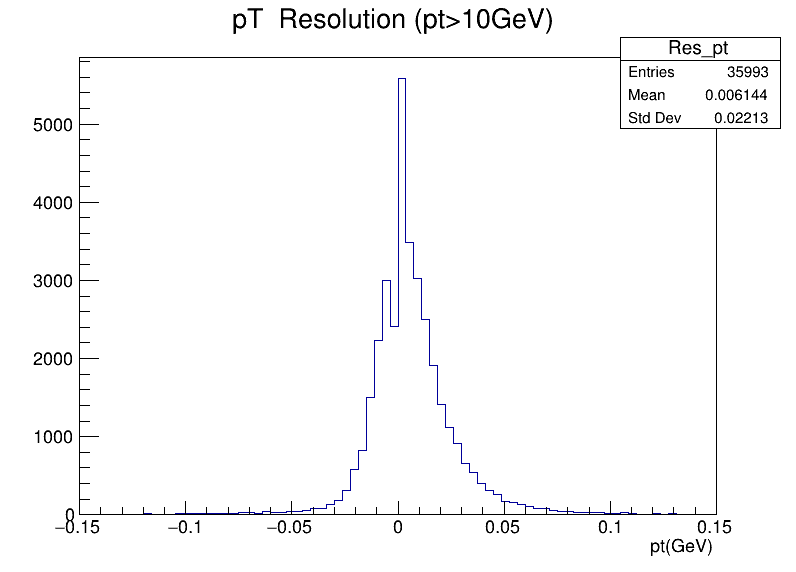

In [16]:
auto pt10_res_hist = df_filter_reco.Histo1D({"Res_pt", "pT  Resolution (pt>10GeV);pt(GeV)", 80, -0.15, 0.15}, "pt_resolution");
auto c3 = new TCanvas("c3", "c3", 800,600);
pt10_res_hist -> Draw();
c3 -> Draw();

### Efficiency

In [17]:
double eff_f = (pt10_res_hist -> GetEntries()) / (*df_filter_reco.Count() *3);
std::cout << "Efficiency: " << eff_f*100 << " %" << std::endl;

Efficiency: 73.4926 %


# $p_T$ > 15 GeV 

In [18]:
bool pt_filter(Vec<float> v){
    return ROOT::VecOps::All(ROOT::VecOps::Map(v, [](float x){return (x>15.f); }));;
}

In [19]:
auto df_pt_filter = df.Filter(pt_filter, {"GenPi_pt"});
cout <<*df_pt_filter.Count()<< endl;

auto df_pt_filter_reco = df_pt_filter.Define("RecoPuppi_idx", RecoTriplet, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Define("RecoGen_idx", RecoTriplet_gen, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Filter(notempty, {"RecoGen_idx"})
                .Define("Reco_pt", "Take(L1Puppi_pt, RecoPuppi_idx)")
                .Define("Gen_pt", "Take(GenPi_pt, RecoGen_idx)")
                .Define("Reco_eta", "Take(L1Puppi_eta, RecoPuppi_idx)")
                .Define("Gen_eta", "Take(GenPi_eta, RecoGen_idx)")
                .Define("Reco_phi", "Take(L1Puppi_phi, RecoPuppi_idx)")
                .Define("Gen_phi", "Take(GenPi_phi, RecoGen_idx)")
                .Define("Reco_mass", "Take(L1Puppi_mass, RecoPuppi_idx)")
                .Define("Gen_mass", "Take(GenPi_mass, RecoGen_idx)")
                .Define("Reco_charge", "Take(L1Puppi_charge, RecoPuppi_idx)")
                .Define("Gen_charge", "Take(GenPi_charge, RecoGen_idx)")
                .Define("pt_resolution", Res_function, {"Reco_pt", "Gen_pt", "Reco_charge", "Gen_charge"});

11879


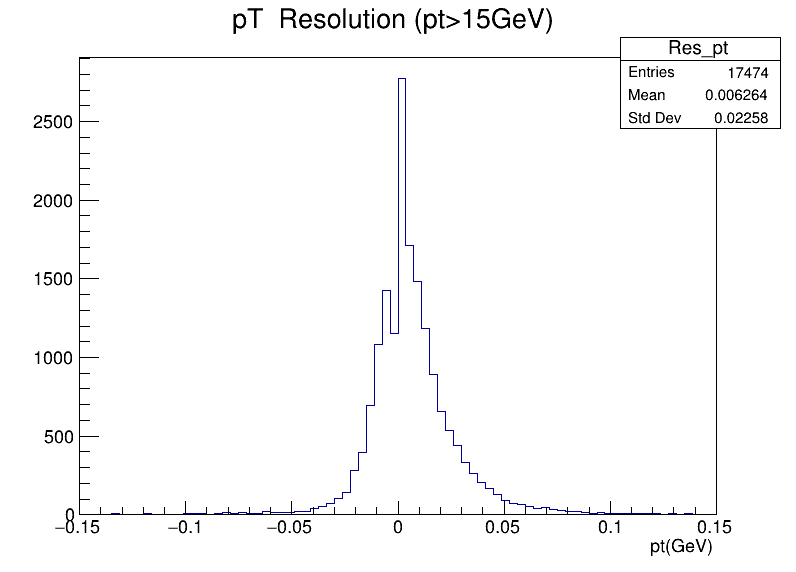

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


In [20]:
auto pt15_res_hist = df_pt_filter_reco.Histo1D({"Res_pt", "pT  Resolution (pt>15GeV);pt(GeV)", 80, -0.15, 0.15}, "pt_resolution");
auto c3 = new TCanvas("c3", "c3", 800,600);
pt15_res_hist -> Draw();
c3 -> Draw();

### Efficiency

In [21]:
double eff_pt = (pt15_res_hist -> GetEntries()) / (*df_pt_filter_reco.Count() *3);
std::cout << "Efficiency: " << eff_pt*100 << " %" << std::endl;

Efficiency: 75.4002 %


# |$\eta$| < 1.5

In [22]:
bool eta_filter(ROOT::VecOps::RVec<float> v){
    return ROOT::VecOps::All(ROOT::VecOps::Map(v, [](float x){return (abs(x)<1.5); }));
}

In [23]:
auto df_eta_filter = df.Filter(eta_filter, {"GenPi_eta"});
cout <<*df_eta_filter.Count()<< endl;

auto df_eta_filter_reco = df_eta_filter.Define("RecoPuppi_idx", RecoTriplet, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Define("RecoGen_idx", RecoTriplet_gen, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Filter(notempty, {"RecoGen_idx"})
                .Define("Reco_pt", "Take(L1Puppi_pt, RecoPuppi_idx)")
                .Define("Gen_pt", "Take(GenPi_pt, RecoGen_idx)")
                .Define("Reco_eta", "Take(L1Puppi_eta, RecoPuppi_idx)")
                .Define("Gen_eta", "Take(GenPi_eta, RecoGen_idx)")
                .Define("Reco_phi", "Take(L1Puppi_phi, RecoPuppi_idx)")
                .Define("Gen_phi", "Take(GenPi_phi, RecoGen_idx)")
                .Define("Reco_mass", "Take(L1Puppi_mass, RecoPuppi_idx)")
                .Define("Gen_mass", "Take(GenPi_mass, RecoGen_idx)")
                .Define("Reco_charge", "Take(L1Puppi_charge, RecoPuppi_idx)")
                .Define("Gen_charge", "Take(GenPi_charge, RecoGen_idx)")
                .Define("pt_resolution", Res_function, {"Reco_pt", "Gen_pt", "Reco_charge", "Gen_charge"});

9242


In [24]:
auto pt_eta_res_hist = df_eta_filter_reco.Histo1D({"Res_pt", "pT  Resolution (|eta|<1.5);pt(GeV)", 80, -0.15, 0.15}, "pt_resolution");
auto c4 = new TCanvas("c4", "c4", 800,600);
pt_eta_res_hist -> Draw();
c4 -> Draw();

input_line_128:2:2: error: Syntax error
 auto pt_eta_res_hist = df_eta_filter_reco.Histo1D({"Res_pt", "pT  Resolution (|eta|<1.5);pt(GeV)", 80, -0.15, 0.15}, "pt_resolution");
 ^
FunctionDecl 0x7fbcf326cc28 <input_line_128:1:1, line:7:1> line:1:6 __cling_Un1Qu361 'void (void *)'
|-ParmVarDecl 0x7fbcf326cb70 <col:23, col:29> col:29 vpClingValue 'void *'
|-CompoundStmt 0x7fbcf326d510 <col:43, line:7:1>
| |-DeclStmt 0x7fbcf326d0b0 <line:2:2, col:135>
| | `-VarDecl 0x7fbcf326cd30 <col:2, col:134> col:7 used pt_eta_res_hist 'auto' cinit
| |   `-CallExpr 0x7fbcf326d080 <col:25, col:134> '<dependent type>'
| |     |-CXXDependentScopeMemberExpr 0x7fbcf326ced0 <col:25, col:44> '<dependent type>' lvalue .Histo1D
| |     | `-DeclRefExpr 0x7fbcf326ce90 <col:25> '<dependent type>' lvalue Var 0x7fbcf326cda0 'df_eta_filter_reco' '<dependent type>'
| |     |-InitListExpr 0x7fbcf326cff0 <col:52, col:116> 'void'
| |     | |-StringLiteral 0x7fbcf326cf18 <col:53> 'const char [7]' lvalue "Res_pt"
| |     |

### Efficiency

In [25]:
double eff_eta = (pt_eta_res_hist -> GetEntries()) / (*df_eta_filter_reco.Count() *3);
std::cout << "Efficiency: " << eff_eta*100 << " %" << std::endl;

input_line_130:2:4: error: use of undeclared identifier 'pt_eta_res_hist'
 ((pt_eta_res_hist->GetEntries()) / (* df_eta_filter_reco.Count() * 3))
   ^
input_line_130:2:40: error: use of undeclared identifier 'df_eta_filter_reco'
 ((pt_eta_res_hist->GetEntries()) / (* df_eta_filter_reco.Count() * 3))
                                       ^
Error in <HandleInterpreterException>: Error evaluating expression ((pt_eta_res_hist->GetEntries()) / (* df_eta_filter_reco.Count() * 3))
Execution of your code was aborted.


# |$\eta$|>1.5

In [26]:
bool eta_filter(ROOT::VecOps::RVec<float> v){
    return ROOT::VecOps::All(ROOT::VecOps::Map(v, [](float x){return (abs(x)>1.5); }));
}

In [27]:
auto df_eta_filter2 = df.Filter(eta_filter, {"GenPi_eta"});
cout <<*df_eta_filter2.Count()<< endl;

auto df_eta_filter_reco2 = df_eta_filter2.Define("RecoPuppi_idx", RecoTriplet, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Define("RecoGen_idx", RecoTriplet_gen, {"GenPi_pt", "GenPi_eta", "GenPi_phi", "GenPi_charge", "L1Puppi_pt", "L1Puppi_eta", "L1Puppi_phi", "L1Puppi_charge", "L1Puppi_pdgId"})
                .Filter(notempty, {"RecoGen_idx"})
                .Define("Reco_pt", "Take(L1Puppi_pt, RecoPuppi_idx)")
                .Define("Gen_pt", "Take(GenPi_pt, RecoGen_idx)")
                .Define("Reco_eta", "Take(L1Puppi_eta, RecoPuppi_idx)")
                .Define("Gen_eta", "Take(GenPi_eta, RecoGen_idx)")
                .Define("Reco_phi", "Take(L1Puppi_phi, RecoPuppi_idx)")
                .Define("Gen_phi", "Take(GenPi_phi, RecoGen_idx)")
                .Define("Reco_mass", "Take(L1Puppi_mass, RecoPuppi_idx)")
                .Define("Gen_mass", "Take(GenPi_mass, RecoGen_idx)")
                .Define("Reco_charge", "Take(L1Puppi_charge, RecoPuppi_idx)")
                .Define("Gen_charge", "Take(GenPi_charge, RecoGen_idx)")
                .Define("pt_resolution", Res_function, {"Reco_pt", "Gen_pt", "Reco_charge", "Gen_charge"});

18049


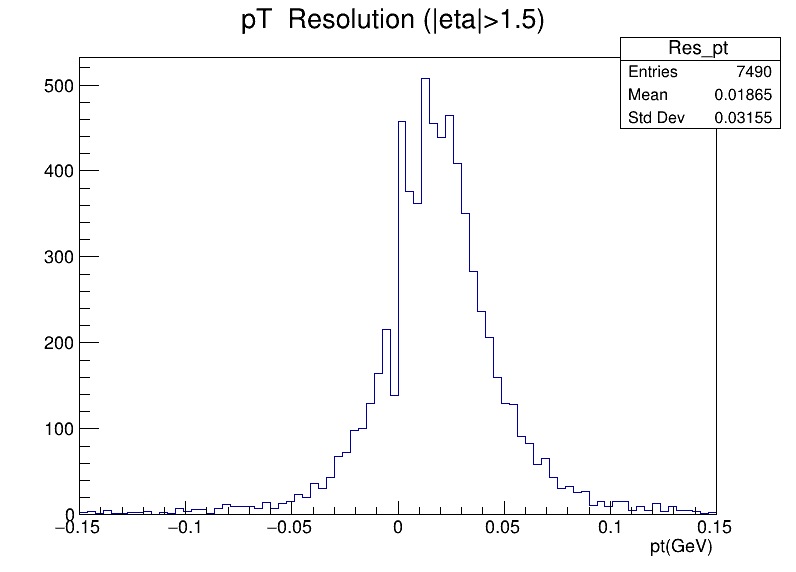

In [28]:
auto pt_eta_res_hist2 = df_eta_filter_reco2.Histo1D({"Res_pt", "pT  Resolution (|eta|>1.5);pt(GeV)", 80, -0.15, 0.15}, "pt_resolution");
auto c5 = new TCanvas("c5", "c5", 800,600);
pt_eta_res_hist2 -> Draw();
c5 -> Draw();

### Efficiency

In [29]:
double eff_eta2 = (pt_eta_res_hist2 -> GetEntries()) / (*df_eta_filter_reco2.Count() *3);
std::cout << "Efficiency: " << eff_eta2*100 << " %" << std::endl;

Efficiency: 48.3569 %
